In [1]:
import audformat
import pandas as pd

In [2]:
df_sample = pd.read_csv('age_files/sample_list.csv', index_col='file')

In [3]:
df_sample = df_sample.rename(columns={'sex':'gender'})
df_sample.to_csv('age_files/ml_age_df.csv')

In [4]:
# Add a column for duration in seconds
def calc_dur(x):
    starts = x[1]
    ends = x[2]
    return (ends - starts).total_seconds()
# add the root folder for audio samples
root = './age_files/'
df_sample = df_sample.set_index(df_sample.index.to_series().map(lambda x:root+x))
# add start and end times
df_sample = df_sample.set_index(audformat.utils.to_segmented_index(df_sample.index, allow_nat=False))
# compute duration
df_sample['duration'] = df_sample.index.to_series().map(lambda x:calc_dur(x)) 

In [5]:
df_sample.head()

,,,speaker,gender,age,duration
file,start,end,,,,
./age_files/magdalena/mm01_m_29.wav,0 days,0 days 00:00:29.717312,mm01,m,29,29.717312
./age_files/magdalena/mm02_f_31.wav,0 days,0 days 00:00:32.048000,mm02,f,31,32.048000
./age_files/magdalena/mm03_f_82.wav,0 days,0 days 00:00:13.897062,mm03,f,82,13.897062
./age_files/magdalena/mm04_m_60.wav,0 days,0 days 00:00:38.107000,mm04,m,60,38.107000
./age_files/magdalena/mm05_f_58.wav,0 days,0 days 00:00:30.676000,mm05,f,58,30.676000


In [6]:
df_sample.shape

(43, 4)

<AxesSubplot: ylabel='Frequency'>

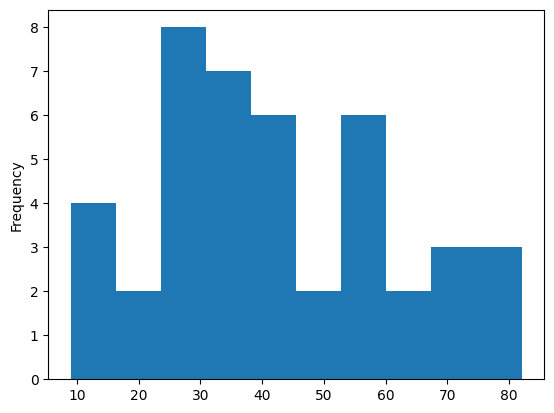

In [7]:
df_sample.age.plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

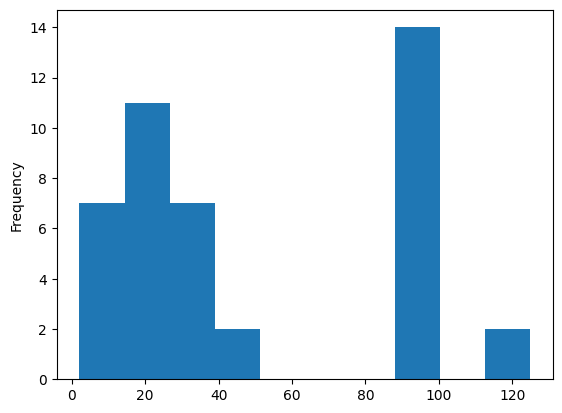

In [8]:
df_sample.duration.plot(kind='hist')

In [9]:
df_sample.duration.idxmax()

('./age_files/hanna/hs12_30.wav',
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:02:04.945375'))

In [10]:
df_sample.duration.idxmin()

('./age_files/felix/004_f_45.wav',
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:02.078187'))

In [15]:
# segment the data
from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
from audformat.utils import to_filewise_index
from audformat import segmented_index
seg = Segmenter()

In [19]:
df_sample.head(1)

,,,speaker,gender,age,duration
file,start,end,,,,
./age_files/magdalena/mm01_m_29.wav,0 days,0 days 00:00:29.717312,mm01,m,29,29.717312


In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_segmentation(file):
    print(f'segmenting {file[0]}')
    segmentation = seg(file[0])
    files, starts, ends = [], [], []
    for entry in segmentation:
        kind = entry[0]
        start = entry[1]
        end = entry[2]
        if kind == 'female' or kind == 'male':
            #print (f'{file}, {start}, {end}')
            files.append(file[0])
            starts.append(start)
            ends.append(end)
    seg_index = segmented_index(files, starts, ends)
    return seg_index

def segment_dataframe(df):
    dfs = []
    for file, values in df.iterrows():
        index = get_segmentation(file)
        dfs.append(
            pd.DataFrame(
                values.to_dict(),
                index,
            )
        )
    return audformat.utils.concat(dfs)

df_seg = segment_dataframe(df_sample)


segmenting ./age_files/magdalena/mm01_m_29.wav
 5/46 [==>...........................] - ETA: 0s

/home/audeering.local/fburkhardt/Private/TU/WS2022/ML/venv/lib/python3.8/site-packages/inaSpeechSegmenter/segmenter.py:61: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/home/audeering.local/fburkhardt/Private/TU/WS2022/ML/venv/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


46/46 [==============================] - 2s 52ms/step
segmenting ./age_files/magdalena/mm02_f_31.wav
46/46 [==============================] - 2s 51ms/step
segmenting ./age_files/magdalena/mm03_f_82.wav
11/22 [==============>...............] - ETA: 0s

/home/audeering.local/fburkhardt/Private/TU/WS2022/ML/venv/lib/python3.8/site-packages/inaSpeechSegmenter/segmenter.py:61: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/home/audeering.local/fburkhardt/Private/TU/WS2022/ML/venv/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


22/22 [==============================] - 1s 52ms/step
segmenting ./age_files/magdalena/mm04_m_60.wav
60/60 [==============================] - 3s 52ms/step
segmenting ./age_files/magdalena/mm05_f_58.wav
48/48 [==============================] - 3s 52ms/step
segmenting ./age_files/magdalena/mm06_m_14.wav
27/27 [==============================] - 1s 51ms/step
segmenting ./age_files/magdalena/mm06_m_34.wav
27/27 [==============================] - 1s 52ms/step
segmenting ./age_files/magdalena/mm06_m_57.wav
61/61 [==============================] - 3s 52ms/step
segmenting ./age_files/magdalena/mm07_m_32.wav
37/37 [==============================] - 2s 51ms/step
segmenting ./age_files/magdalena/mm08_f_31.wav
39/39 [==============================] - 2s 51ms/step
segmenting ./age_files/magdalena/mm09_f_23.wav
41/41 [==============================] - 2s 50ms/step
segmenting ./age_files/magdalena/mm10_m_33.wav
41/41 [==============================] - 2s 49ms/step
segmenting ./age_files/magdalena/mm11

In [24]:
df_seg.head()

speaker  \
file                                start                  end                              
./age_files/magdalena/mm01_m_29.wav 0 days 00:00:00        0 days 00:00:15.820000    mm01   
                                    0 days 00:00:16.520000 0 days 00:00:29.700000    mm01   
./age_files/magdalena/mm02_f_31.wav 0 days 00:00:00        0 days 00:00:12.820000    mm02   
                                    0 days 00:00:13.620000 0 days 00:00:17.840000    mm02   
                                    0 days 00:00:18.440000 0 days 00:00:20.880000    mm02   

                                                                                  gender  \
file                                start                  end                             
./age_files/magdalena/mm01_m_29.wav 0 days 00:00:00        0 days 00:00:15.820000      m   
                                    0 days 00:00:16.520000 0 days 00:00:29.700000      m   
./age_files/magdalena/mm02_f_31.wav 0 days 00:00:00        0 days 00:00:12.820000      f   
                                    0 days 00:00:13.620000 0 days 00:00:17.840000      f   
                                    0 days 00:00:18.440000 0 days 00:00:20.880000      f   

                                                                                   age  \
file                                start                  end                           
./age_files/magdalena/mm01_m_29.wav 0 days 00:00:00        0 days 00:00:15.820000   29   
                                    0 days 00:00:16.520000 0 days 00:00:29.700000   29   
./age_files/magdalena/mm02_f_31.wav 0 days 00:00:00        0 days 00:00:12.820000   31   
                                    0 days 00:00:13.620000 0 days 00:00:17.840000   31   
                                    0 days 00:00:18.440000 0 days 00:00:20.880000   31   

                                                                                    duration  
file                                start                  end                                
./age_files/magdalena/mm01_m_29.wav 0 days 00:00:00        0 days 00:00:15.820000  29.717312  
                                    0 days 00:00:16.520000 0 days 00:00:29.700000  29.717312  
./age_files/magdalena/mm02_f_31.wav 0 days 00:00:00        0 days 00:00:12.820000  32.048000  
                                    0 days 00:00:13.620000 0 days 00:00:17.840000  32.048000  
                                    0 days 00:00:18.440000 0 days 00:00:20.880000  32.048000

In [25]:
df_seg.to_csv('age_files/ml_age_segmented.csv')